# Beer Foam

In [1]:
import cv2
import matplotlib.pyplot as plt
import copy

## Load, convert to grayscale, resize

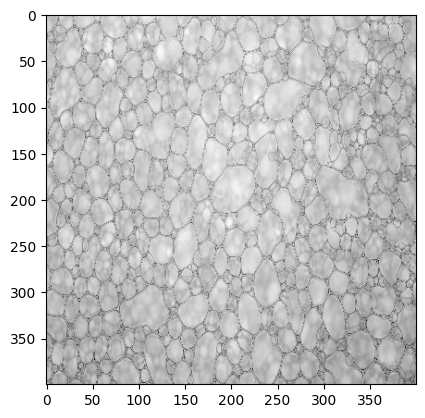

In [2]:
img = cv2.imread("beer.tif")
img = cv2.resize(img, (400, 400), cv2.INTER_NEAREST) # NN interpolation

orig_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img, cmap="gray")

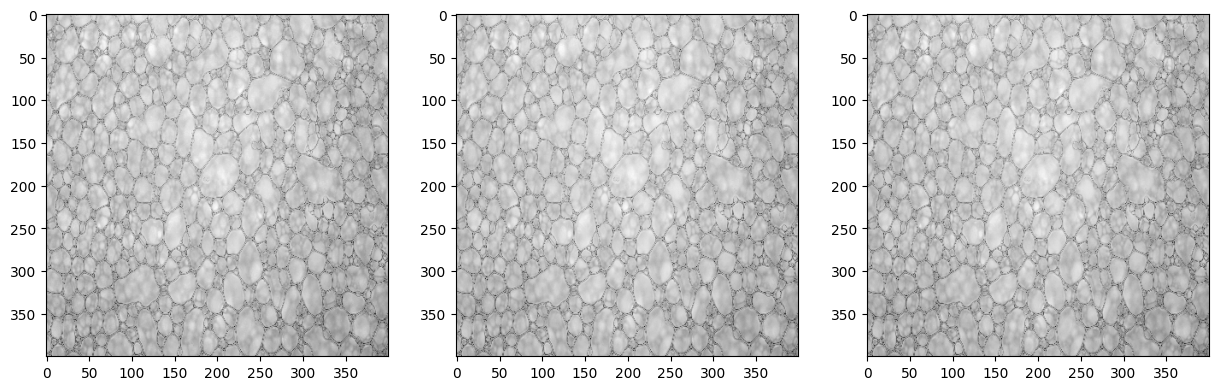

In [3]:
fig = plt.figure(figsize=(15,30))

img_split = cv2.split(orig_img)

rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(img_split[0], cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.imshow(img_split[1], cmap="gray")

fig.add_subplot(rows, columns, 3)
plt.imshow(img_split[2], cmap="gray")

plt.show()

## Reduce Noise by Blurring

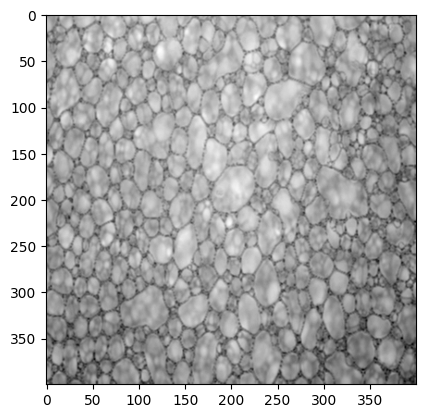

In [4]:
filtered = cv2.GaussianBlur(img, (3, 3), 0) # using original grayscale image
plt.imshow(filtered, cmap="gray")

 ## Binarization

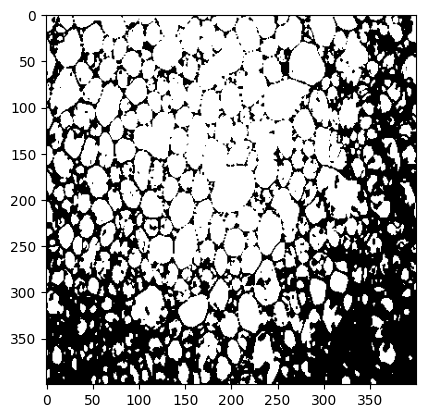

In [5]:
_, bin_img = cv2.threshold(filtered, 0, 255, cv2.THRESH_OTSU) # not suitable for blurred image
plt.imshow(bin_img, cmap="gray")

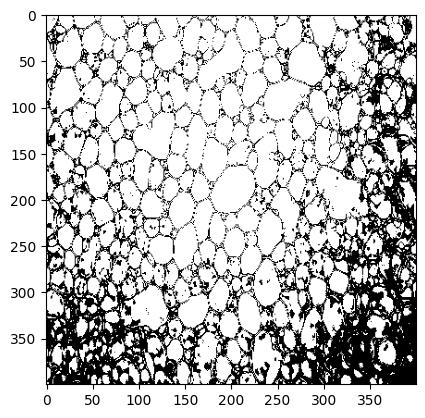

In [6]:
_, bin_img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU) # not quite suitable for unblurred image either
plt.imshow(bin_img, cmap="gray")

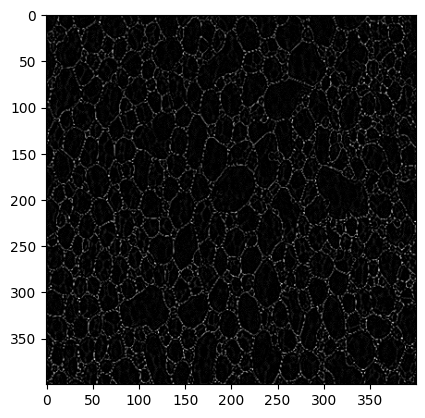

In [7]:
bin_img = cv2.Laplacian(filtered, -1) # filtered image
plt.imshow(bin_img, cmap="gray")

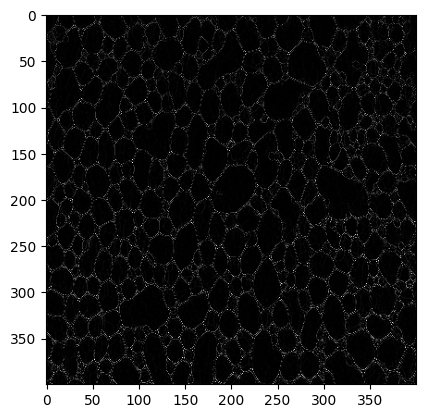

In [8]:
bin_img = cv2.Laplacian(img, -1) # unfiltered image - less noise in edge image
plt.imshow(bin_img, cmap="gray")

## Use Laplacian edges - dilate for better separation after binarization

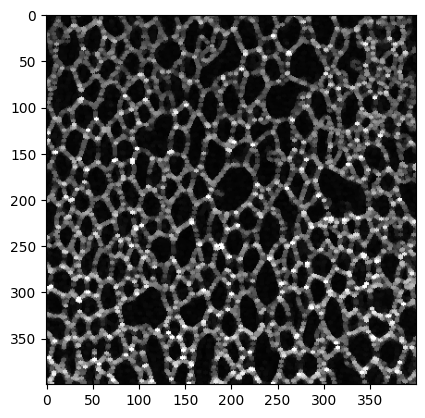

In [9]:
struct_elem = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)) 
bin_img = cv2.dilate(bin_img, struct_elem, iterations=1)
plt.imshow(bin_img, cmap="gray")

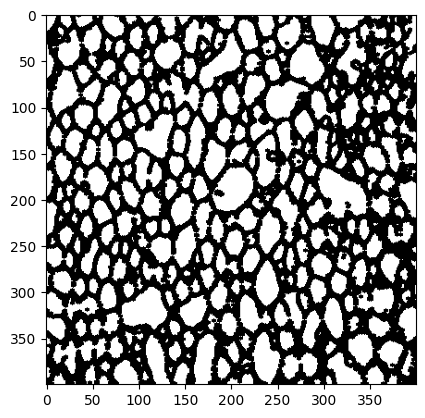

In [10]:
_, bin_img = cv2.threshold(bin_img, 20, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bin_img, cmap="gray")

## Count bubbles

In [11]:
contours, _ = cv2.findContours(bin_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(f"Number of bubbles {len(contours)}")

Number of bubbles 409


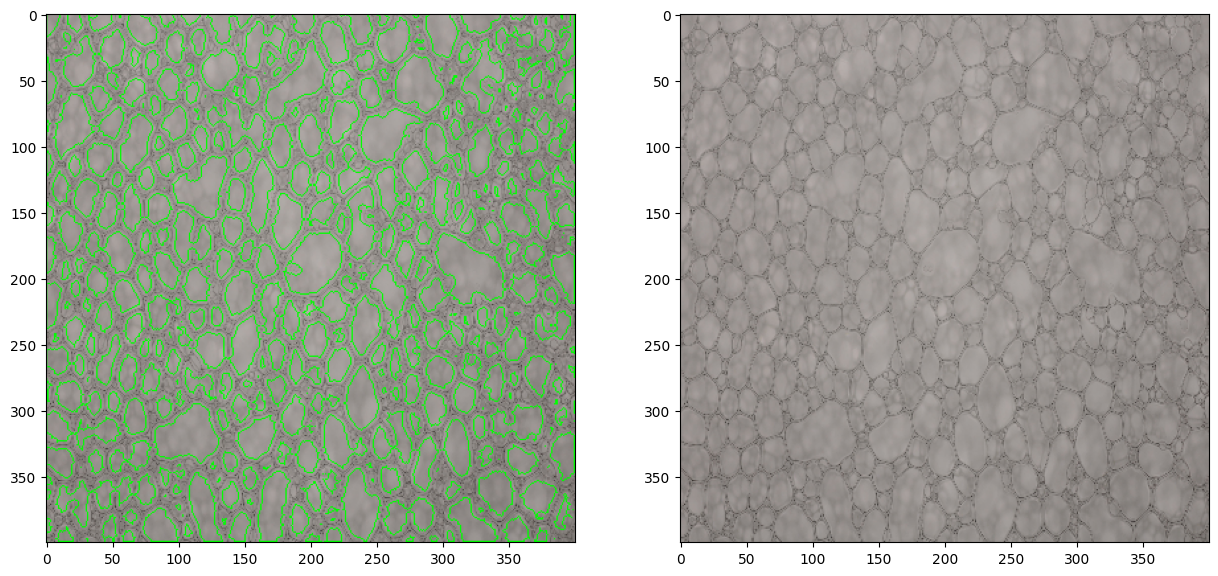

In [12]:
img_no_contours = copy.deepcopy(orig_img)
img_contours = cv2.drawContours(orig_img, contours, -1, (0, 255, 0))

fig = plt.figure(figsize=(15,30))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(img_contours)

fig.add_subplot(rows, columns, 2)
plt.imshow(img_no_contours)

plt.show()